In [1]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#importing data
dataset=read_csv('BostonHousing.csv')
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# shape
print(dataset.shape)

(506, 14)


In [4]:
# types
print(dataset.dtypes)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


In [5]:
# head
print(dataset.head(20))


       crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.004   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

In [6]:
# descriptions
# set_option('precision', 1)
print(dataset.describe().T)

         count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.283385    0.702842    3.56100    5.884250    6.20500   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
b        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
lstat    506

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
# correlation
# set_option('precision', 2)
print(dataset.corr(method='pearson'))


             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.218553  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311271 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.394759  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091707  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.303483  0.731470   
rm      -0.218553  0.311271 -0.394759  0.091707 -0.303483  1.000000 -0.242050   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.242050  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.203216 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209408  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292364  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.356483  0.261515   
b       -0.385064  0.175520 

## Data Visualizations
### Unimodal Data Visualizations

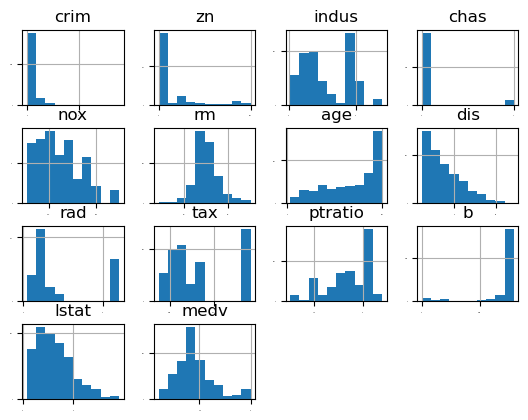

In [9]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()


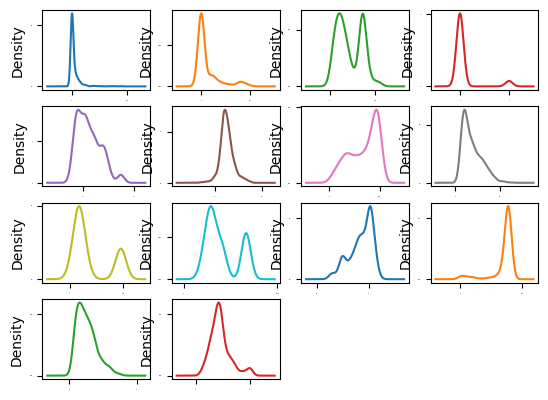

In [10]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,fontsize=1)
pyplot.show()

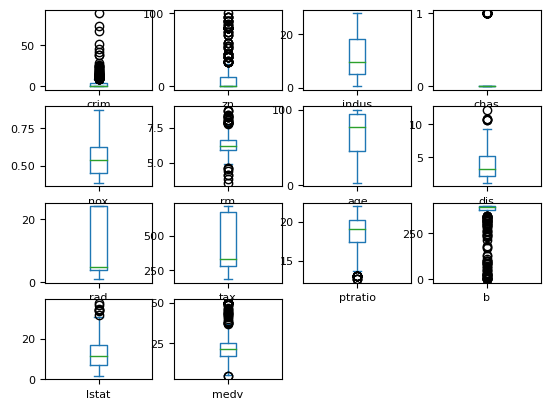

In [11]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8)
pyplot.show()

### Multimodal Data Visualizations

In [12]:
# # scatter plot matrix
# scatter_matrix(dataset)
# pyplot.show()


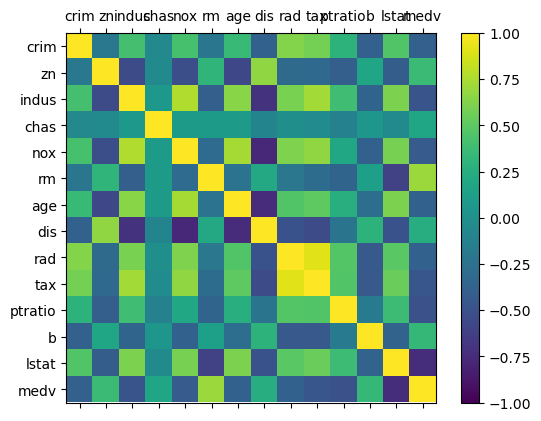

In [13]:
# correlation matrix
names= dataset.columns
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()


### Validation Dataset

In [14]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

### Evaluate Algorithms: Baseline
The six algorithms selected include:
* Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet(EN).
* Nonlinear Algorithms: Classification and Regression Trees (CART), Support VectorRegression (SVR) and k-Nearest Neighbors (KNN).

In [15]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'


In [16]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [17]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#LR has the lowest MSE


LR: -22.061907 (12.195100)
LASSO: -27.129711 (13.186587)
EN: -27.945176 (13.168060)
KNN: -39.808936 (16.507968)
CART: -26.990466 (20.346584)
SVR: -67.824700 (32.801713)


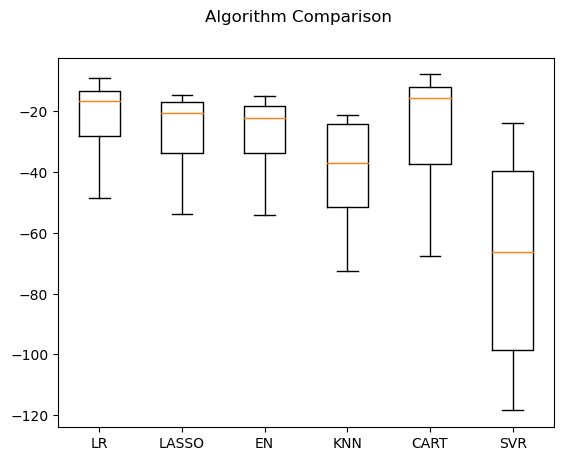

In [18]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

'''The differing scales of the data is probably hurting the skill of all of the algorithms and
perhaps more so for SVR and KNN.'''

### Evaluate Algorithms: Standardization

In [20]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -22.061907 (12.195100)
ScaledLASSO: -27.197105 (12.171615)
ScaledEN: -28.283508 (13.654032)
ScaledKNN: -21.456701 (15.020193)
ScaledCART: -25.920498 (18.365712)
ScaledSVR: -29.648518 (18.136186)


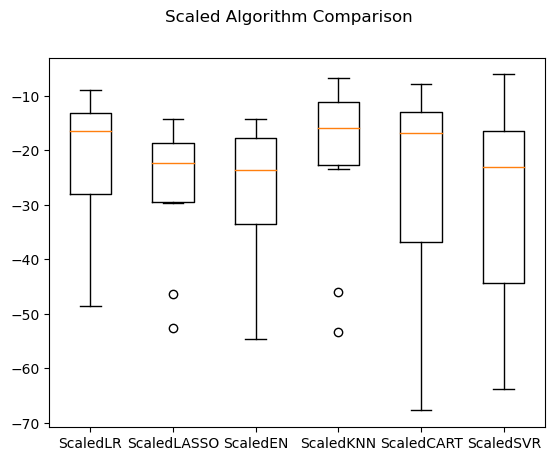

In [21]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


###  Improve Results With Tuning
KNN achieves good results on a scaledversion of the dataset. But can it do better. The default value for the number of neighbors inKNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if wecan improve the score. The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross validation on a standardized copy of the training dataset.

In [23]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [24]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.512287 using {'n_neighbors': 1}
-19.512287 (15.832337) with: {'n_neighbors': 1}
-19.941052 (13.805929) with: {'n_neighbors': 3}
-21.359255 (14.827216) with: {'n_neighbors': 5}
-21.741872 (14.897016) with: {'n_neighbors': 7}
-20.904713 (14.723395) with: {'n_neighbors': 9}
-21.601023 (14.820823) with: {'n_neighbors': 11}
-21.352132 (14.501519) with: {'n_neighbors': 13}
-22.046009 (14.233455) with: {'n_neighbors': 15}
-22.850104 (14.468254) with: {'n_neighbors': 17}
-23.590472 (14.934558) with: {'n_neighbors': 19}
-24.369361 (15.260467) with: {'n_neighbors': 21}


###  Ensemble Methods
we will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:
* Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
* Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [25]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledAB: -15.593141 (8.476749)
ScaledGBM: -10.176081 (8.133854)
ScaledRF: -12.876758 (9.572882)
ScaledET: -9.312730 (7.073606)


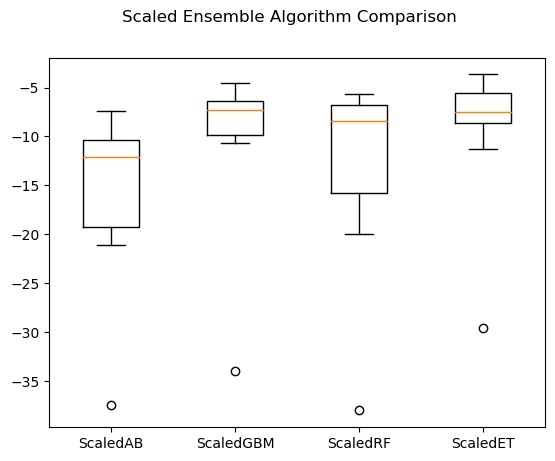

In [26]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

'''Gradient Boosting has a better mean score, it also looks like Extra Trees has a
similar distribution and perhaps a better median score.
'''

## Tune Ensemble Methods

In [29]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -9.922110 using {'n_estimators': 400}
-10.852364 (8.311964) with: {'n_estimators': 50}
-10.286402 (8.368166) with: {'n_estimators': 100}
-10.120810 (8.370319) with: {'n_estimators': 150}
-10.016637 (8.163119) with: {'n_estimators': 200}
-10.015529 (8.086811) with: {'n_estimators': 250}
-10.001497 (8.033915) with: {'n_estimators': 300}
-9.971138 (8.042928) with: {'n_estimators': 350}
-9.922110 (7.908113) with: {'n_estimators': 400}


## Finalize Model


In [30]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)


GradientBoostingRegressor(n_estimators=400, random_state=7)

In [32]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

13.130016356313842
